In [111]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data


games = pd.read_csv(r"C:\Users\Summe\ICE_Game_Forcast\games.csv")

# Dispalay the first few rows of the data

games.isnull().sum()
games.info()
display(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Initial overview of data

Data needs to be cleaned in the following ways

1. change to lower case. Python is case specific, keeping everything lowercase can prevent issues in code. 
2. make sure any spaces are changed to "_". Spaces need to be "_" for proper code usage, it can be difficult to see if any columns have a space in front or behind, so adding this will make it obvious for code usage later on.
3. correct Dtypes (i.e year_of_release -> Int64). This is done to prevent errors in Analysis later on.
4. there are several colums with missing data (remove/replace NaN values). This data could be missing due to the year_of_relese, many of the critic_score, user_score, and rating are on older games likely due to this information not being collected at the time. 
5. remove excess NaN value rows. This is to remove any rows that will not provide any significant information to our Analysis.
5. add an additional colum called "total_sales" since the goal of analysis is to determine which games are worth advertising.

In [112]:
# change to lower case

games.columns = games.columns.str.lower()

# check for spaces in the column names

games.columns = games.columns.str.replace(' ', '_')

display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [113]:

# correct Dtypes of the columns

games["year_of_release"] = games["year_of_release"].astype("Int64")

games["user_score"] = games["user_score"].replace("tbd", np.nan).astype(float)

# remove rows with too many missing values (more than 2)

games = games.dropna(thresh=len(games.columns) - 2)


# add a column for total sales

games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

games.info()
display(games.head())



<class 'pandas.core.frame.DataFrame'>
Index: 10021 entries, 0 to 16706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             10021 non-null  object 
 1   platform         10021 non-null  object 
 2   year_of_release  9864 non-null   Int64  
 3   genre            10021 non-null  object 
 4   na_sales         10021 non-null  float64
 5   eu_sales         10021 non-null  float64
 6   jp_sales         10021 non-null  float64
 7   other_sales      10021 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9923 non-null   object 
 11  total_sales      10021 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.0+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


After cleaning, data is much easier to read.

1. converted to lower case for consistancy
2. updated dtypes for proper analysis
3. removed excessive NaN value rows since they won't contribute key information to later analysis
4. added a total_sales column


In [114]:

# correct Dtypes of the columns

games["year_of_release"] = games["year_of_release"].astype("Int64")

games["user_score"] = games["user_score"].replace("tbd", np.nan).astype(float)

# remove rows with too many missing values

games = games.dropna(thresh=len(games.columns))


# add a column for total sales

games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

games.info()
display(games.head())



<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   Int64  
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   float64
 9   user_score       6826 non-null   float64
 10  rating           6826 non-null   object 
 11  total_sales      6826 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 699.9+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


# Analysis guidlines

1. Look at how many games were released in different years. Is the data for every period significant?
2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
3. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.
4. Work only with the data that you've decided is relevant. Disregard the data for previous years.
5. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
6. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
7. Take a look at how user and professional reviews affect sales for one popular platform.
8. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
9. Keeping your conclusions in mind, compare the sales of the same games on other platforms.
10. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [115]:
# Analyze the data

# Count the number of games released per year
games_per_year = games["year_of_release"].value_counts().sort_index()

# Create a bar chart using Plotly Express
fig = px.bar(
    games_per_year,
    x=games_per_year.index,
    y=games_per_year.values,
    labels={"x": "Year of Release", "y": "Number of Games Released"},
    title="Number of Games Released Per Year",
)

# Show the plot
fig.show()


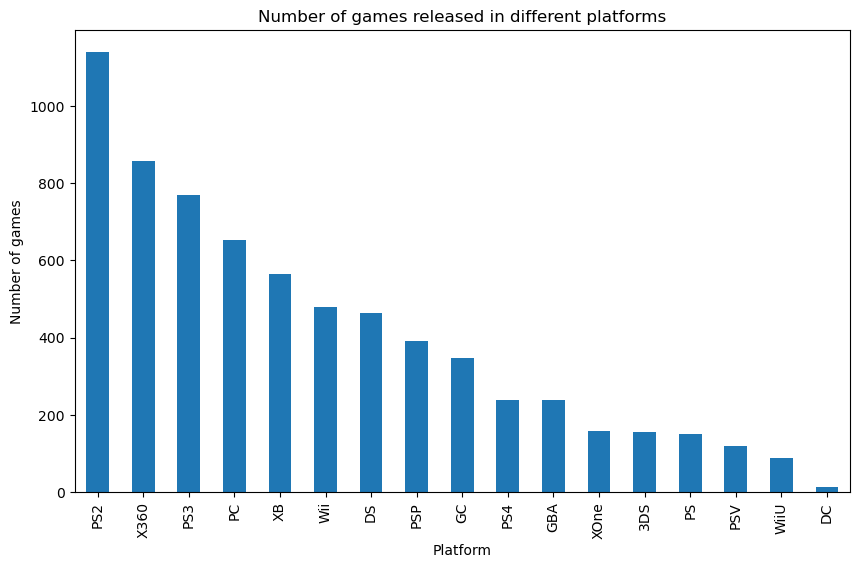

In [116]:
# Number of games released in different platforms

games["platform"].value_counts().plot(kind="bar", figsize=(10, 6))
plt.title("Number of games released in different platforms")
plt.xlabel("Platform")
plt.ylabel("Number of games")
plt.show()

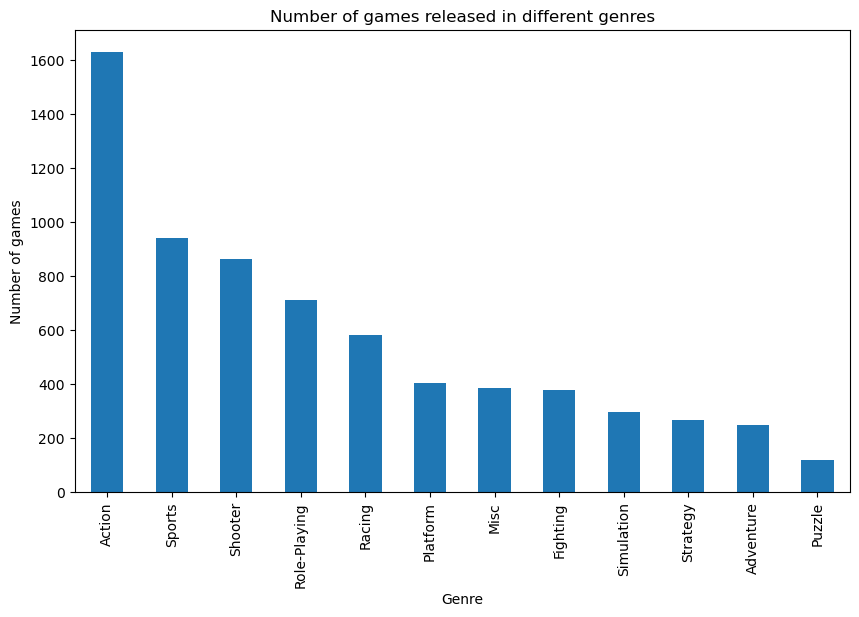

In [117]:
# Number of games released in different genres

games["genre"].value_counts().plot(kind="bar", figsize=(10, 6))
plt.title("Number of games released in different genres")
plt.xlabel("Genre")
plt.ylabel("Number of games")
plt.show()

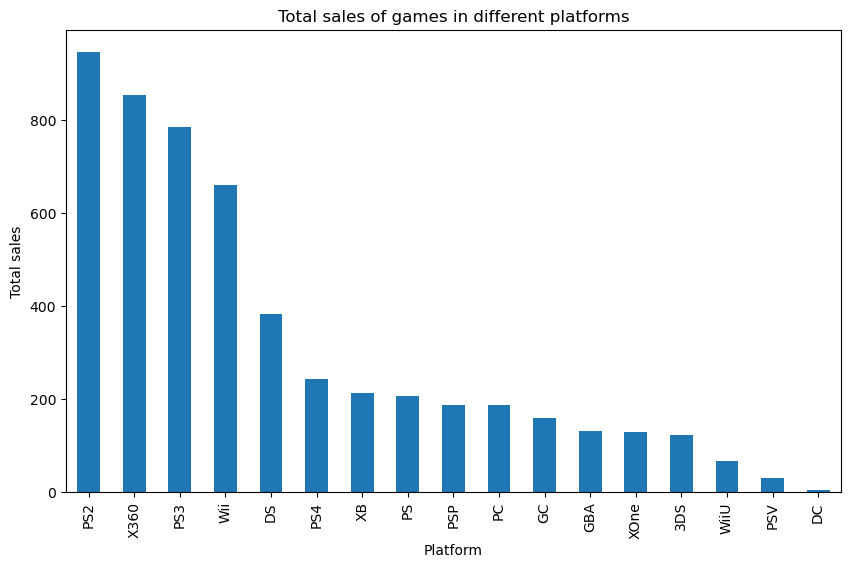

Total sales of games in different platforms:


platform
PS2     946.01
X360    853.24
PS3     784.45
Wii     658.97
DS      382.22
PS4     243.00
XB      211.93
PS      206.65
PSP     187.68
PC      186.71
GC      159.25
GBA     131.70
XOne    129.48
3DS     123.22
WiiU     66.08
PSV      30.83
DC        4.55
Name: total_sales, dtype: float64

In [118]:
# Total sales of games in different platforms

platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
platform_sales.plot(kind="bar", figsize=(10, 6))
plt.title("Total sales of games in different platforms")
plt.xlabel("Platform")
plt.ylabel("Total sales")
plt.show()

print("Total sales of games in different platforms:")
display(platform_sales)

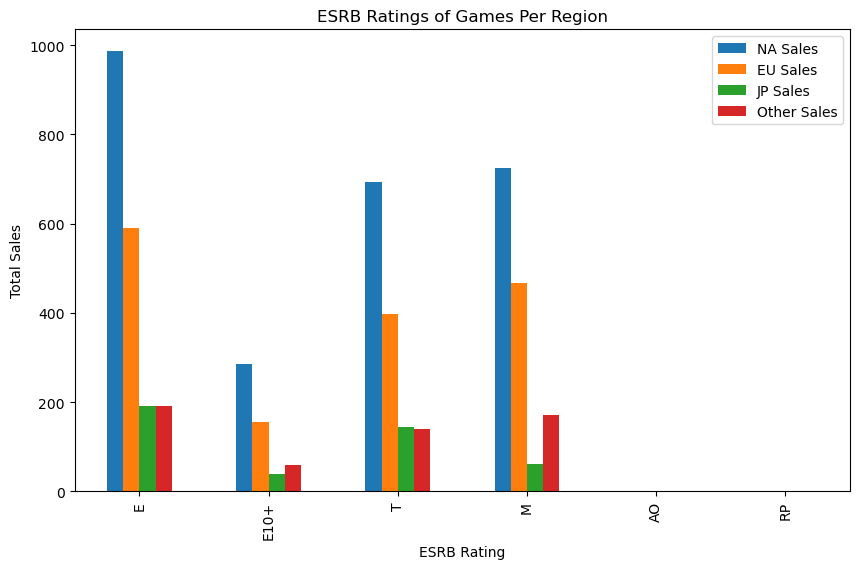

In [127]:
# ESRB ratings of games per region

esrb_ratings = ["E", "E10+", "T", "M", "AO", "RP"]
na_sales = []
eu_sales = []
jp_sales = []
other_sales = []

for rating in esrb_ratings:
    na_sales.append(games.query("rating == @rating")["na_sales"].sum())
    eu_sales.append(games.query("rating == @rating")["eu_sales"].sum())
    jp_sales.append(games.query("rating == @rating")["jp_sales"].sum())
    other_sales.append(games.query("rating == @rating")["other_sales"].sum())

esrb_sales = pd.DataFrame(
    {
        "Rating": esrb_ratings,
        "NA Sales": na_sales,
        "EU Sales": eu_sales,
        "JP Sales": jp_sales,
        "Other Sales": other_sales,
    }
)

esrb_sales.set_index("Rating", inplace=True)
esrb_sales.plot(kind="bar", figsize=(10, 6))
plt.title("ESRB Ratings of Games Per Region")
plt.xlabel("ESRB Rating")
plt.ylabel("Total Sales")
plt.show()


In [128]:
# total sales by top platforms

# playstation sales
playstation_sales = round(games.query("platform in ['PS', 'PS2', 'PS3' , 'PSV']")["total_sales"].sum(),2)

# xbox sales
xbox_sales = round(games.query("platform in ['X360', 'XB', 'XOne']")["total_sales"].sum(),2)

# nintendo sales
nintendo_sales = round(games.query("platform in ['Wii','WiiU']")["total_sales"].sum(),2)

# gameboy sales (Nintendo)
gameboy_sales = round(games.query("platform in ['DS', 'GB', 'GBA', '3DS']")["total_sales"].sum(),2)

display(f"Playstation Sales: {playstation_sales}")
display(f"Xbox Sales: {xbox_sales}")
display(f"Nintendo Sales: {nintendo_sales}")
display(f"Gameboy Sales: {gameboy_sales}")

'Playstation Sales: 1967.94'

'Xbox Sales: 1194.65'

'Nintendo Sales: 725.05'

'Gameboy Sales: 637.14'

Based on the sales total for Playstation, Xbox, and Nintendo, and Gameboy Platforms the highest sales figure comes in for Playstation. (While Gameboy is a Nintendo product, the Wii and Gameboy platforms are seperated due to one being handheld and one being a console)

In [129]:
# playstation distribution

playstation_distribution = (
    games.query("platform in ['PS', 'PS2', 'PS3', 'PSV']")
    .groupby(["year_of_release", "platform"])["total_sales"]
    .sum()
    .unstack()  # Makes platforms columns for better readability
)

# xbox distribution

xbox_distribution = (
    games.query("platform in ['X360', 'XB', 'XOne']")
    .groupby(["year_of_release", "platform"])["total_sales"]
    .sum()
    .unstack()  # Makes platforms columns for better readability
)

# nintendo distribution

nintendo_distribution = (
    games.query("platform in ['Wii','WiiU']")
    .groupby(["year_of_release", "platform"])["total_sales"]
    .sum()
    .unstack()  # Makes platforms columns for better readability
)

# gameboy distribution

gameboy_distribution = (
    games.query("platform in ['DS', 'GB', 'GBA', '3DS']")
    .groupby(["year_of_release", "platform"])["total_sales"]
    .sum()
    .unstack()  # Makes platforms columns for better readability
)

# Fill NaN values with 0 before percentage calculation
playstation_distribution = playstation_distribution.fillna(0)
xbox_distribution = xbox_distribution.fillna(0)
nintendo_distribution = nintendo_distribution.fillna(0)
gameboy_distribution = gameboy_distribution.fillna(0)

# calculate the percentage of sales per year

playstation_distribution = (playstation_distribution / playstation_sales * 100).round(2)
xbox_distribution = (xbox_distribution / xbox_sales * 100).round(2)
nintendo_distribution = (nintendo_distribution / nintendo_sales * 100).round(2)
gameboy_distribution = (gameboy_distribution / gameboy_sales * 100).round(2)

# Convert to string and add percentage sign
playstation_distribution = playstation_distribution.astype(str) + '%'
xbox_distribution = xbox_distribution.astype(str) + '%'
nintendo_distribution = nintendo_distribution.astype(str) + '%'
gameboy_distribution = gameboy_distribution.astype(str) + '%'

display("Distribution by Year:")
display(playstation_distribution, xbox_distribution, nintendo_distribution, gameboy_distribution)


'Distribution by Year:'

platform,PS,PS2,PS3,PSV
year_of_release,,,,
1994,0.06%,0.0%,0.0%,0.0%
1996,0.89%,0.0%,0.0%,0.0%
1997,1.57%,0.0%,0.0%,0.0%
1998,2.19%,0.0%,0.0%,0.0%
1999,2.49%,0.0%,0.0%,0.0%
2000,2.32%,1.5%,0.0%,0.0%
2001,0.97%,7.42%,0.0%,0.0%
2002,0.01%,8.64%,0.0%,0.0%
2003,0.0%,7.33%,0.0%,0.0%


platform,X360,XB,XOne
year_of_release,,,
2000,0.0%,0.08%,0.0%
2001,0.0%,1.73%,0.0%
2002,0.0%,3.37%,0.0%
2003,0.0%,3.55%,0.0%
2004,0.0%,4.9%,0.0%
2005,0.64%,3.46%,0.0%
2006,4.09%,0.6%,0.0%
2007,7.48%,0.05%,0.0%
2008,10.81%,0.0%,0.0%


platform,Wii,WiiU
year_of_release,,
2006,18.62%,0.0%
2007,17.56%,0.0%
2008,18.07%,0.0%
2009,20.83%,0.0%
2010,9.37%,0.0%
2011,4.62%,0.0%
2012,1.82%,2.05%
2013,0.0%,2.4%
2014,0.0%,2.1%


platform,3DS,DS,GBA
year_of_release,,,
2001,0.0%,0.0%,5.75%
2002,0.0%,0.0%,4.35%
2003,0.0%,0.0%,3.75%
2004,0.0%,0.53%,5.24%
2005,0.0%,15.07%,1.18%
2006,0.0%,11.39%,0.4%
2007,0.0%,12.16%,0.0%
2008,0.0%,9.84%,0.0%
2009,0.0%,6.19%,0.0%


Based on these distributions. It looks to take roughly 7-10 years for a platform to hit a 0% sales, typically a year or so after the next generation of that platform is released. Additionally, It appears that the platforms will hit their peak sales after 3-4 years from release before they start to taper down.


Based on the trends. the XboxOne is going to be at their peak post release time of four years in 2017, this would give us the best data to pull from for this project. So lets look at XboxOne data for marketing.

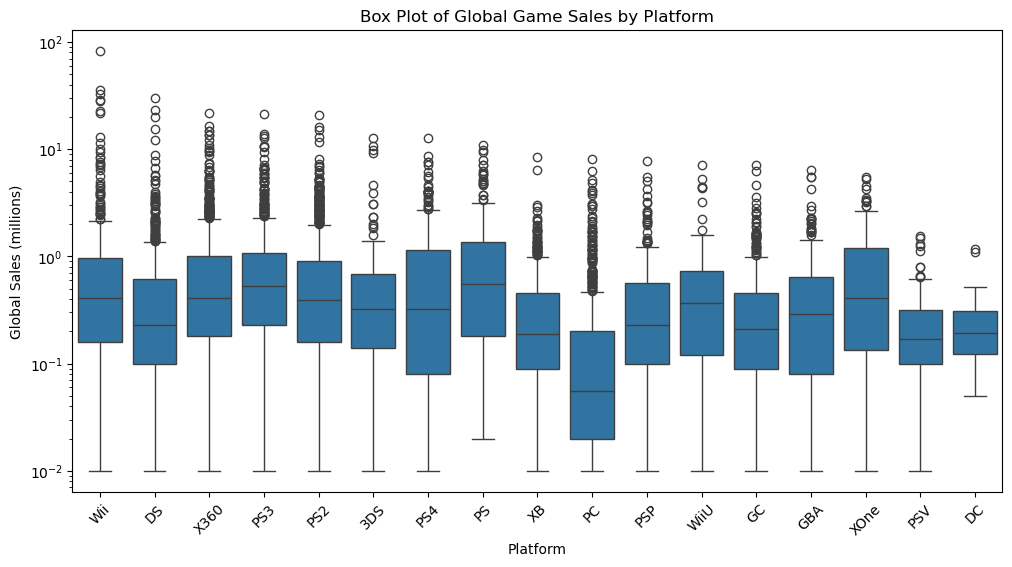

'Average Sales per Platform (millions):'

platform
PS      1.377667
Wii     1.375720
PS3     1.020091
PS4     1.016736
X360    0.994452
PS2     0.829833
DS      0.823750
XOne    0.814340
3DS     0.794968
WiiU    0.742472
GBA     0.555696
PSP     0.481231
GC      0.457615
XB      0.375097
DC      0.325000
PC      0.286365
PSV     0.261271
Name: total_sales, dtype: float64

In [130]:
# boxplot of global game sales by platform
plt.figure(figsize=(12, 6))
sns.boxplot(x="platform", y="total_sales", data=games)

plt.yscale("log")  # Use log scale to better visualize variations
plt.xticks(rotation=45)  # Rotate platform names for readability
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.title("Box Plot of Global Game Sales by Platform")

# Show plot
plt.show()

# Calculate average sales per platform
average_sales = games.groupby("platform")["total_sales"].mean().sort_values(ascending=False)

# Display results
display("Average Sales per Platform (millions):")
display(average_sales)


In [131]:
import plotly.express as px

# Filter data for Xbox One games
xbox_one_games = games.query("platform == 'XOne'")

# Scatter plot with hover data
fig = px.scatter(
    xbox_one_games,  # Pass the entire dataframe
    x="user_score",  # x-axis: user reviews
    y="total_sales",  # y-axis: total sales
    hover_data=["name", "na_sales", "jp_sales", "eu_sales", "other_sales"],  # Additional data in hover
    labels={"user_score": "User Reviews", "total_sales": "Total Sales (millions)"},
    title="User Reviews for Xbox One Platform Games vs Total Sales",
)

# Show the plot
fig.show()


This scatter plot shows that the User Reviews for Xbox One Platform Games does affect the number of sales of the game. However, there are a few outliers with lower scores that still outperform those with higher.


In [132]:
import plotly.express as px

# Filter data for Xbox One and PlayStation games
xbox_games = games.query("platform == 'XOne'")
playstation_games = games.query("platform in ['PS', 'PS2', 'PS3', 'PSV']")

# Group by 'name' to get total sales across platforms for the same game
xbox_sales_by_game = xbox_games.groupby("name")[["na_sales", "jp_sales", "eu_sales", "other_sales", "total_sales"]].sum()
playstation_sales_by_game = playstation_games.groupby("name")[["na_sales", "jp_sales", "eu_sales", "other_sales", "total_sales"]].sum()

# Merge Xbox and PlayStation sales data by game name
merged_sales = xbox_sales_by_game.merge(playstation_sales_by_game, on="name", suffixes=('_xbox', '_playstation'))

# Merge back to the original Xbox dataset for plotting
xbox_games = xbox_games.merge(merged_sales, on="name")

# Scatter plot with hover data
fig = px.scatter(
    xbox_games,  # Pass the merged dataframe
    x="user_score",  # x-axis: user reviews
    y="total_sales_xbox",  # y-axis: total sales for Xbox One
    hover_data=["name", "na_sales_xbox", "jp_sales_xbox", "eu_sales_xbox", "other_sales_xbox",
                "na_sales_playstation", "jp_sales_playstation", "eu_sales_playstation", "other_sales_playstation"],  # Additional data in hover
    labels={"user_score": "User Reviews", "total_sales_xbox": "Total Sales (Xbox One, millions)"},
    title="User Reviews for Xbox One vs PlayStation Platform Games with Total Sales Comparison",
)

# Show the plot
fig.show()


This scatter plot shows games that go accross the Xbox and Playstation Platforms. This reflects that while there are some games that cross over platforms, each platform has most of the games available as exlusive. However, based on user score, some games had high sales on both platforms.

**Step 4**

Create a user profile for each region

For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

In [133]:
# NA user profile - top 5 platforms
na_user_profile = games.groupby("platform")[["na_sales"]].sum().sort_values(by="na_sales", ascending=False).head(5)
na_user_profile = na_user_profile / na_user_profile.sum() * 100  # Convert to percentage
na_user_profile = na_user_profile.round(2)

# EU user profile - top 5 platforms
eu_user_profile = games.groupby("platform")[["eu_sales"]].sum().sort_values(by="eu_sales", ascending=False).head(5)
eu_user_profile = eu_user_profile / eu_user_profile.sum() * 100  # Convert to percentage
eu_user_profile = eu_user_profile.round(2)

# JP user profile - top 5 platforms
jp_user_profile = games.groupby("platform")[["jp_sales"]].sum().sort_values(by="jp_sales", ascending=False).head(5)
jp_user_profile = jp_user_profile / jp_user_profile.sum() * 100  # Convert to percentage
jp_user_profile = jp_user_profile.round(2)

# Concatenate the top 5 user profiles into a single DataFrame
user_profiles = pd.concat([na_user_profile, eu_user_profile, jp_user_profile], axis=1)

# replace NaN values with 0
user_profiles = user_profiles.fillna(0)

# Rename the columns for clarity
user_profiles.columns = ['NA Sales (%)', 'EU Sales (%)', 'JP Sales (%)']

# Display the results
display("Top 5 User Profile by Region:")
display(user_profiles)


'Top 5 User Profile by Region:'

,NA Sales (%),EU Sales (%),JP Sales (%)
platform,,,
X360,28.62,21.72,0.00
PS2,25.36,23.65,24.84
Wii,18.40,18.92,17.16
PS3,18.33,25.35,17.86
DS,9.30,0.00,27.41
PS4,0.00,10.36,0.00
PS,0.00,0.00,12.73


This shows what the top 5 platforms are per region. (non top 5 are represented as a 0)

In [134]:
# ESRB rating distribution per region
na_rating_distribution = games.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
eu_rating_distribution = games.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
jp_rating_distribution = games.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)

# concatenate the rating distributions into a single DataFrame
rating_distribution = pd.concat([na_rating_distribution, eu_rating_distribution, jp_rating_distribution], axis=1)


# Display the results
display("Rating Distribution by Region: (in millions)")
display(rating_distribution)



'Rating Distribution by Region: (in millions)'

,na_sales,eu_sales,jp_sales
rating,,,
E,986.02,590.78,190.67
M,724.61,467.07,62.28
T,694.23,396.82,144.66
E10+,286.03,155.94,38.81
AO,1.26,0.61,0.00
K-A,0.26,0.16,1.46
RP,0.00,0.03,0.00


This data does show that ESRB rating does effect the total sales of a game, with ESRB rating of "E" providing the most sales of all ratings

**Step 5. Test the following hypotheses:**

—Average user ratings of the Xbox One and PC platforms are the same. 

—Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

In [135]:
import scipy.stats as stats

# Set alpha value for the tests
alpha = 0.05

# Test 1: Compare average user ratings of Xbox One and PC platforms
xbox_one_ratings = games.query("platform == 'XOne'")["user_score"].dropna()
pc_ratings = games.query("platform == 'PC'")["user_score"].dropna()

# Perform t-test for platform comparison
t_stat_platform, p_value_platform = stats.ttest_ind(xbox_one_ratings, pc_ratings)

# Display results for hypothesis 1
if p_value_platform < alpha:
    result_platform = "Reject the null hypothesis: The average user ratings of Xbox One and PC platforms are different."
else:
    result_platform = "Fail to reject the null hypothesis: The average user ratings of Xbox One and PC platforms are the same."

# Test 2: Compare average user ratings for Action and Sports genres
action_ratings = games.query("genre == 'Action'")["user_score"].dropna()
sports_ratings = games.query("genre == 'Sports'")["user_score"].dropna()

# Perform t-test for genre comparison
t_stat_genre, p_value_genre = stats.ttest_ind(action_ratings, sports_ratings)

# Display results for hypothesis 2
if p_value_genre < alpha:
    result_genre = "Reject the null hypothesis: The average user ratings for Action and Sports genres are different."
else:
    result_genre = "Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same."

# Print the results
print("Hypothesis 1 (Platform Comparison):", result_platform)
print("Hypothesis 2 (Genre Comparison):", result_genre)


Hypothesis 1 (Platform Comparison): Reject the null hypothesis: The average user ratings of Xbox One and PC platforms are different.
Hypothesis 2 (Genre Comparison): Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are the same.


**Conclusion**

In this project, we analyzed video game sales data across different platforms, genres, and regions to identify trends and insights. The dataset contains information on game sales in North America (NA), Europe (EU), Japan (JP), and other regions, along with user and critic ratings.

The key objectives were:

* To identify the most popular platforms and genres across different regions.
* To assess whether user ratings influence total sales.
* To test hypotheses about user ratings across platforms and genres.


**Sales Trends by Platform and Region**

The most popular platforms vary by region:

* North America (NA): Xbox 360 and PlayStation 2 dominate the market.
* Europe (EU): PlayStation 2 and PlayStation 4 have the highest sales.
* Japan (JP): Nintendo platforms, such as DS and Wii, outperform Xbox and PlayStation.
* PlayStation platforms tend to perform well globally, while Xbox consoles are more dominant in NA.

**Sales Trends by Genre**


* Action and Shooter games have the highest sales in NA and EU, likely due to popular franchises like Call of Duty and Grand Theft Auto.
* RPGs dominate in Japan, reflecting the strong market for games from companies like Nintendo and Square Enix.
* Sports games (e.g., FIFA and NBA 2K) are popular worldwide, especially in NA and EU.

**ESRB Ratings and Sales**


* Mature (M) rated games tend to have higher sales in NA and EU, where shooter and action games are popular.
* E (Everyone) rated games sell well globally, especially in Japan, where family-friendly and handheld games dominate.
* Teen (T) rated games have a more balanced sales distribution.

**Hypothesis results**

Hypothesis 1 states the average user ratings of Xbox One and PC platforms are not the same. This hypothesis was to find if the average user ratings were the same accross the platforms, we found that they are not. This means that users of each platform have different preferences in games or gameplay.

Hypothesis 2 states that the average user ratings for genres(action and sports specifically) are the not the same. This means the hypothesis that average user ratings are the same between genres failed and represents that users have prefered genres.

We used an alpha of 0.5 since it was the standard alpha used for a Null hypothesis. It represents up to only a 5% probablity of an error.

**Limitations and Considerations**


* Incomplete 2016 Data: Sales and ratings for 2016 may not be fully recorded, impacting trend analysis.
* Missing User Scores: Some games have missing ratings, which could affect hypothesis testing accuracy.
* Regional Preferences: Cultural differences in gaming preferences impact platform and genre popularity.

**Recommendations for Marketing in 2017**

Based on the analysis of platform sales, genre trends, user ratings, and regional preferences, we can make data-driven recommendations for game development and marketing strategies for 2017.

**Platform Strategy**


* Target PlayStation 4 and Xbox One for Western Markets

Why? PlayStation 4 and Xbox One continue to dominate North America (NA) and Europe (EU).
Recommendation: Focus on AAA game releases, optimized graphics, and online multiplayer experiences for these platforms.
* Prioritize Nintendo Platforms for Japan

Why? Nintendo's platforms (e.g., Wii, DS, and 3DS) are the most successful in Japan, and with the Nintendo Switch launching in 2017, the trend is expected to continue.
Recommendation: Market more RPGs, adventure games, and handheld-friendly titles in Japan.
* Reduce Investment in Older Platforms

Why? Sales for PS2, Xbox 360, and Wii are declining rapidly.
Recommendation: Shift development and marketing budgets toward next-gen consoles (PS4, Xbox One, Switch) and PC.

**Genre Strategy**

* Invest in Action, Shooter, and Sports Games in NA & EU

Why? These genres dominate sales in North America and Europe.
Recommendation:
Market first-person shooters (FPS) like Call of Duty & Battlefield with multiplayer engagement strategies.
Continue investment in Sports franchises (FIFA, Madden, NBA 2K).
* Focus on RPGs and Adventure Games in Japan

Why? The Japanese market favors RPGs and story-driven games over shooters.
Recommendation:
Invest in anime-style RPGs, turn-based battle systems, and story-driven single-player games.
Partner with Nintendo and PlayStation for exclusive RPG titles.


**ESRB Rating Strategy**

* Market More Mature (M) Games in NA & EU

Why? M-rated games generate the highest revenue in Western markets, especially in the Action and Shooter genres.
Recommendation:
Focus marketing on gamers aged 18-35, emphasizing realism, competition, and online features.
Use eSports sponsorships, Twitch, and influencer marketing to boost visibility.
* Market More Family-Friendly (E) Games in Japan

Why? E-rated games dominate Japanese sales, with a preference for Nintendo titles and handheld gaming.
Recommendation:
Focus on casual and portable games for handheld devices (Switch, 3DS).
Collaborate with Japanese publishers (e.g., Nintendo, Bandai Namco) for localization and anime-themed adaptations.


**Key Takeaways for 2017**

* Prioritize PS4, Xbox One, and Nintendo Switch – Older platforms are fading.
* Invest in Action, Shooter, and Sports games for NA & EU – Market through eSports and online play.
* Focus on RPGs and Family-friendly games for Japan – Nintendo and handheld gaming dominate.
* Leverage influencers and streaming platforms – eSports, Twitch, and YouTube are essential for engagement.
* Monetize through DLCs, in-game purchases, and live services – Long-term player retention is key.

**Final Recommendation:**
* For NA & EU:

Develop multiplayer shooters, action-adventure games, and sports titles for PS4 and Xbox One.
Use eSports partnerships and Twitch marketing for promotions.
* For Japan:

Focus on RPGs and handheld-friendly games for Nintendo Switch and 3DS.
Target anime and mobile gaming markets with gacha mechanics and localized content.
By following these strategies, we can maximize sales and market penetration in 2017!